## 1. Importar Librerías

Primero importamos todas las librerías necesarias para el análisis.

In [152]:
# Librerías básicas para manipulación de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Librerías para dividir datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Librerias de los modelos
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor

# Métricas de evaluación
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error,  # Regresión
    silhouette_score,  # Clustering
    accuracy_score, classification_report, confusion_matrix  # Clasificación
)

# Configurar seed para reproducibilidad
np.random.seed(42)

# Configurar visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


## 2. Cargar y Explorar los Datos

Vamos a cargar los datos desde los archivos CSV y hacer una primera exploración.

In [153]:
# Cargar los datos desde archivos CSV
print("Cargando datos...")

# Cargar hoteles
hoteles = pd.read_csv('datos/hoteles.csv')
print(f"Hoteles cargados: {len(hoteles):,} registros")

# Cargar habitaciones
habitaciones = pd.read_csv('datos/precios_habitaciones.csv')
print(f"Habitaciones cargadas: {len(habitaciones):,} registros")

# Cargar servicios
servicios_hotel = pd.read_csv('datos/servicios_hotel.csv')
servicios_habitacion = pd.read_csv('datos/servicios_habitacion.csv')

print(f"Servicios de hotel: {len(servicios_hotel):,}")
print(f"Servicios de habitación: {len(servicios_habitacion):,}")
print("\nDatos cargados correctamente")

Cargando datos...
Hoteles cargados: 108,278 registros
Hoteles cargados: 108,278 registros
Habitaciones cargadas: 570,320 registros
Servicios de hotel: 750
Servicios de habitación: 139

Datos cargados correctamente
Habitaciones cargadas: 570,320 registros
Servicios de hotel: 750
Servicios de habitación: 139

Datos cargados correctamente


In [154]:
# Explorar datos de HOTELES
print("DATOS DE HOTELES")
print("=" * 30)
print(f"Forma de los datos: {hoteles.shape}")
print(f"\nColumnas disponibles:")
for i, col in enumerate(hoteles.columns, 1):
    print(f"{i:2d}. {col}")

# Mostrar primeras filas
print("\nPrimeras 3 filas:")
hoteles.head(3)

DATOS DE HOTELES
Forma de los datos: (108278, 16)

Columnas disponibles:
 1. id_hotel
 2. hotel_name
 3. stars
 4. price
 5. address
 6. lat
 7. lon
 8. vote_booking
 9. type
10. description
11. id_country
12. checkin_min
13. checkin_max
14. checkout_min
15. checkout_max
16. facilities

Primeras 3 filas:


,id_hotel,hotel_name,stars,price,address,lat,lon,vote_booking,type,description,id_country,checkin_min,checkin_max,checkout_min,checkout_max,facilities
0,3518692,"Tarifa Cozy House - BEACH, POOL, TERRACE, WIFI",3,NaN,"Urbanización Las Cañas B6, 11380 Tarifa, España",36.016710,-5.610011,6.4,2,NaN,195,NaN,NaN,NaN,NaN,[]
1,3518659,Waikiki beach 5 pax,3,NaN,"Grupo Cardenal Cisneros, 11380 Tarifa, España",36.011698,-5.608009,NaN,2,NaN,195,NaN,NaN,NaN,NaN,"[780,791,830,869]"
2,3518655,El Mar,-1,NaN,"4 Calle Cruz Roja, 11380 Tarifa, España",36.011128,-5.605286,NaN,2,NaN,195,NaN,NaN,NaN,NaN,"[767,768,773,774,775,776,777,779,780,781,782,7..."


In [155]:
# Explorar datos de HABITACIONES
print("DATOS DE HABITACIONES")
print("=" * 30)
print(f"Forma de los datos: {habitaciones.shape}")
print(f"\nColumnas disponibles:")
for i, col in enumerate(habitaciones.columns, 1):
    print(f"{i:2d}. {col}")

# Mostrar primeras filas
print("\nPrimeras 3 filas:")
habitaciones.head(3)

DATOS DE HABITACIONES
Forma de los datos: (570320, 9)

Columnas disponibles:
 1. id
 2. id_hotel
 3. title
 4. start_date
 5. end_date
 6. capacity
 7. room_size
 8. price
 9. facilities

Primeras 3 filas:


,id,id_hotel,title,start_date,end_date,capacity,room_size,price,facilities
0,12487987,14899,Alojamiento Deluxe Red Level (3 adultos),2022-10-29,2022-11-05,3,38,6580,"[43,42,3,4,5,6,7,8,9,12,14,15,46,31,47,58,16,4..."
1,12488020,94537,Habitación Doble - 1 o 2 camas,2022-08-25,2022-09-01,2,-1,460,"[3,4,5,9,12,15,46,31,58,41,49,17,19,20,35,22,2..."
2,12488022,94537,Apartamento Dúplex,2022-08-25,2022-09-01,2,22,600,"[85,4,5,7,9,12,87,15,46,88,31,47,58,41,16,48,4..."


## 3. Limpieza y Preprocesamiento de Datos

Ahora vamos a limpiar los datos eliminando valores nulos y preparándolos para Machine Learning.

In [156]:
# Analizar valores nulos en los datos
print("ANÁLISIS DE VALORES NULOS")
print("=" * 40)

print("\nHOTELES:")
nulos_hoteles = hoteles.isnull().sum()
print(nulos_hoteles[nulos_hoteles > 0])

print("\nHABITACIONES:")
nulos_habitaciones = habitaciones.isnull().sum()
print(nulos_habitaciones[nulos_habitaciones > 0])

print(f"\nPorcentaje de completitud:")
print(f"Hoteles: {((hoteles.shape[0] * hoteles.shape[1] - hoteles.isnull().sum().sum()) / (hoteles.shape[0] * hoteles.shape[1]) * 100):.1f}%")
print(f"Habitaciones: {((habitaciones.shape[0] * habitaciones.shape[1] - habitaciones.isnull().sum().sum()) / (habitaciones.shape[0] * habitaciones.shape[1]) * 100):.1f}%")

ANÁLISIS DE VALORES NULOS

HOTELES:
price           76119
vote_booking    35728
description     47575
checkin_min     47128
checkin_max     47128
checkout_min    47128
checkout_max    47130
dtype: int64

HABITACIONES:
Series([], dtype: int64)

Porcentaje de completitud:
Hoteles: 79.9%
Habitaciones: 100.0%


Parsear las facilities de las habitaciones

In [157]:
# Función para convertir string de lista a lista real
def parse_instalaciones(valor):
    if pd.isna(valor):
        return []
    try:
        # Convertir string como "[1,2,3]" a lista real [1,2,3]
        return eval(str(valor))
    except:
        return []

print("\nProcesando instalaciones...")

# Aplicar la función a la columna de instalaciones
habitaciones['instalaciones_lista'] = habitaciones['facilities'].apply(parse_instalaciones)

# Crear un diccionario para mapear IDs a nombres de instalaciones
id_to_name = dict(zip(servicios_habitacion['id'], servicios_habitacion['name']))

# Función para obtener nombres de instalaciones en lugar de IDs
def get_nombres_instalaciones(ids):
    return [id_to_name.get(id_inst, f"Desconocido-{id_inst}") for id_inst in ids]

# Agregar columna con nombres de instalaciones
habitaciones['instalaciones_nombres'] = habitaciones['instalaciones_lista'].apply(get_nombres_instalaciones)


# Crear una lista plana con todas las instalaciones
todas_instalaciones = []
for lista in habitaciones['instalaciones_lista'].dropna():
    todas_instalaciones.extend(lista)


# Crear columnas binarias (one-hot encoding) para cada instalación
print("\nCreando columnas binarias para cada instalación...")


# Crear dataframe con columnas binarias
for id_inst in set(todas_instalaciones):
    nombre_inst = id_to_name.get(id_inst, f"inst_{id_inst}")
    col_name = f"tiene_{nombre_inst.lower().replace(' ', '_').replace('/', '_')}"
    
    # Crear columna binaria
    habitaciones[col_name] = habitaciones['instalaciones_lista'].apply(
        lambda x: 1 if id_inst in x else 0
    )

# Mostrar las primeras filas con algunas columnas binarias
columnas_binarias = [col for col in habitaciones.columns if col.startswith('tiene_')]
print(f"\nCreadas {len(columnas_binarias)} columnas binarias para instalaciones")
print("\nEjemplo de datos con columnas binarias:")
display(habitaciones[['id'] + columnas_binarias].head())




Procesando instalaciones...

Creando columnas binarias para cada instalación...

Creando columnas binarias para cada instalación...

Creadas 137 columnas binarias para instalaciones

Ejemplo de datos con columnas binarias:

Creadas 137 columnas binarias para instalaciones

Ejemplo de datos con columnas binarias:


,id,tiene_balcón,tiene_vistas,tiene_aire_acondicionado,tiene_baño_privado,tiene_tv_de_pantalla_plana,tiene_insonorización,tiene_cafetera,tiene_minibar,tiene_wifi_gratis,...,tiene_vistas_al_lago,tiene_lavavajillas,tiene_barbacoa,tiene_vistas_al_río,tiene_internet_facilities,tiene_detached,tiene_private_flat_in_block_of_flats,tiene_wireless_internet,tiene_electric_blankets,tiene_semi-detached
0,12487987,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,12488020,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,12488022,0,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,12488023,0,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12487961,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
# Limpiar datos de HOTELES
print("LIMPIANDO DATOS DE HOTELES...")
print(f"Registros originales: {len(hoteles):,}")

# Copiar datos originales
hoteles_clean = hoteles.copy()

# Filtrar hoteles con estrellas válidas (0-5)
hoteles_clean = hoteles_clean[(hoteles_clean['stars'] >= 0) & (hoteles_clean['stars'] <= 5)]
print(f"Después de filtrar estrellas válidas: {len(hoteles_clean):,}")

# Eliminar precios negativos o cero
hoteles_clean = hoteles_clean[hoteles_clean['price'] > 0]
print(f"Después de filtrar precios válidos: {len(hoteles_clean):,}")

print(f"\nHoteles limpios: {len(hoteles_clean):,} ({len(hoteles_clean)/len(hoteles)*100:.1f}% del total)")

LIMPIANDO DATOS DE HOTELES...
Registros originales: 108,278
Después de filtrar estrellas válidas: 95,781
Después de filtrar precios válidos: 28,891

Hoteles limpios: 28,891 (26.7% del total)


In [159]:
# Limpiar datos de HABITACIONES
print("LIMPIANDO DATOS DE HABITACIONES...")
print(f"Registros originales: {len(habitaciones):,}")

# Copiar datos originales
habitaciones_clean = habitaciones.copy()

# Eliminar habitaciones sin precio o con precio inválido
habitaciones_clean = habitaciones_clean[habitaciones_clean['price'] > 0]
print(f"Después de filtrar precios válidos: {len(habitaciones_clean):,}")

# Eliminar habitaciones sin capacidad
habitaciones_clean = habitaciones_clean[habitaciones_clean['capacity'] > 0]
print(f"Después de filtrar capacidad válida: {len(habitaciones_clean):,}")

# Rellenar valores faltantes en room_size con la mediana
mediana_size = habitaciones_clean['room_size'].median()
habitaciones_clean['room_size'] = habitaciones_clean['room_size'].fillna(mediana_size)

print(f"\nHabitaciones limpias: {len(habitaciones_clean):,} ({len(habitaciones_clean)/len(habitaciones)*100:.1f}% del total)")

LIMPIANDO DATOS DE HABITACIONES...
Registros originales: 570,320
Después de filtrar precios válidos: 570,320
Después de filtrar capacidad válida: 570,320

Habitaciones limpias: 570,320 (100.0% del total)
Después de filtrar precios válidos: 570,320
Después de filtrar capacidad válida: 570,320

Habitaciones limpias: 570,320 (100.0% del total)


## 4. Preparar Datos para los modelos


### Modelos de regresion

In [164]:
# Preparar datos para MODELO DE REGRESIÓN

# Combinar datos de habitaciones con información de hoteles
datos_regresion = habitaciones_clean.merge(
    hoteles_clean[['id_hotel', 'stars', 'vote_booking', 'type']], 
    on='id_hotel', 
    how='inner'
)

print(f"Registros combinados: {len(datos_regresion):,}")

# Seleccionar características para predecir el precio
caracteristicas_regresion = ['capacity', 'room_size', 'stars', 'vote_booking', 'type'] + columnas_binarias
X_regresion = datos_regresion[caracteristicas_regresion]
y_regresion = datos_regresion['price']

print(f"Características: {caracteristicas_regresion}")
print(f"Variable objetivo: precio de habitación")
print(f"Datos para regresión: {X_regresion.shape[0]} filas, {X_regresion.shape[1]} características")
print(f"Rango de precios: {y_regresion.min():.0f} € - {y_regresion.max():.0f} €")

Registros combinados: 494,782
Características: ['capacity', 'room_size', 'stars', 'vote_booking', 'type', 'tiene_balcón', 'tiene_vistas', 'tiene_aire_acondicionado', 'tiene_baño_privado', 'tiene_tv_de_pantalla_plana', 'tiene_insonorización', 'tiene_cafetera', 'tiene_minibar', 'tiene_wifi_gratis', 'tiene_free_toiletries', 'tiene_shower', 'tiene_bath-robe', 'tiene_safe_deposit_box', 'tiene_towels', 'tiene_tv', 'tiene_slippers', 'tiene_telephone', 'tiene_satellite_channels', 'tiene_coffee_tea_maker', 'tiene_heating', 'tiene_hair_dryer', 'tiene_wake_up_service', 'tiene_wardrobe_closet', 'tiene_upper_floor_reachable_by_lift', 'tiene_toilet_paper', 'tiene_hand_sanitizer_in_room', 'tiene_individual_air_conditioning', 'tiene_bañera', 'tiene_toilet', 'tiene_desk', 'tiene_refrigerator', 'tiene_clothing_iron', 'tiene_radio', 'tiene_interconnecting_room(s)_available', 'tiene_microwave', 'tiene_carpeted_floor', 'tiene_cable_channels', 'tiene_alarm_clock', 'tiene_wooden___parquet_floor', 'tiene_vist

In [165]:

# ARREGLAR: Limpiar valores NaN antes de entrenar
print("Limpiando valores NaN...")
datos_limpios = datos_regresion[caracteristicas_regresion + ['price']].dropna()
print(f"Registros después de limpiar NaN: {len(datos_limpios):,}")

# Separar características y objetivo
X_regresion_clean = datos_limpios[caracteristicas_regresion]
y_regresion_clean = datos_limpios['price']

# Dividir datos en entrenamiento y prueba
print("Dividiendo datos para regresión (Train y Test)...")
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regresion_clean, y_regresion_clean, 
    test_size=0.2, 
    random_state=42
)

print(f"Datos de entrenamiento: {X_train_reg.shape[0]:,} habitaciones")
print(f"Datos de prueba: {X_test_reg.shape[0]:,} habitaciones")
print(f"Proporción: {X_train_reg.shape[0]/(X_train_reg.shape[0]+X_test_reg.shape[0])*100:.0f}% entrenamiento, {X_test_reg.shape[0]/(X_train_reg.shape[0]+X_test_reg.shape[0])*100:.0f}% prueba")

# Escalar los datos para mejor rendimiento
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)


Limpiando valores NaN...
Registros después de limpiar NaN: 427,359
Dividiendo datos para regresión (Train y Test)...
Registros después de limpiar NaN: 427,359
Dividiendo datos para regresión (Train y Test)...
Datos de entrenamiento: 341,887 habitaciones
Datos de prueba: 85,472 habitaciones
Proporción: 80% entrenamiento, 20% prueba
Datos de entrenamiento: 341,887 habitaciones
Datos de prueba: 85,472 habitaciones
Proporción: 80% entrenamiento, 20% prueba


### Modelos de clustering

In [166]:
# Preparar datos para MODELO DE CLUSTERING

# Seleccionar características para agrupar hoteles
caracteristicas_clustering = ['stars', 'price', 'vote_booking']
X_clustering = hoteles_clean[caracteristicas_clustering].dropna()

print(f"Características: {caracteristicas_clustering}")
print(f"Datos para clustering: {X_clustering.shape[0]} hoteles, {X_clustering.shape[1]} características")

Características: ['stars', 'price', 'vote_booking']
Datos para clustering: 23417 hoteles, 3 características


### Modelos de clasificación

In [178]:
# Preparar datos para MODELO DE CLASIFICACIÓN

# Seleccionar características para predecir estrellas
caracteristicas_clasificacion = ['price', 'vote_booking', 'type']
X_clasificacion = hoteles_clean[caracteristicas_clasificacion].dropna()
y_clasificacion = hoteles_clean.loc[X_clasificacion.index, 'stars']

print(f"Características: {caracteristicas_clasificacion}")
print(f"Variable objetivo: estrellas del hotel (1-5)")
print(f"Datos para clasificación: {X_clasificacion.shape[0]} hoteles, {X_clasificacion.shape[1]} características")
print(f"Distribución de estrellas:")
for estrella in sorted(y_clasificacion.unique()):
    count = (y_clasificacion == estrella).sum()
    print(f"  {estrella} estrellas: {count:,} hoteles ({count/len(y_clasificacion)*100:.1f}%)")

Características: ['price', 'vote_booking', 'type']
Variable objetivo: estrellas del hotel (1-5)
Datos para clasificación: 23417 hoteles, 3 características
Distribución de estrellas:
  0 estrellas: 4,587 hoteles (19.6%)
  1 estrellas: 946 hoteles (4.0%)
  2 estrellas: 2,137 hoteles (9.1%)
  3 estrellas: 9,449 hoteles (40.4%)
  4 estrellas: 5,892 hoteles (25.2%)
  5 estrellas: 406 hoteles (1.7%)


## 5. Modelo de Regresión 


### Regresión Lineal


In [128]:
# Regresión Lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train_reg_scaled, y_train_reg)

print("Modelo entrenado")

Modelo entrenado


In [129]:
# Evaluar modelo de regresión
print("Evaluando modelo de regresión...")

# Predicciones
y_pred_lineal = modelo_lineal.predict(X_test_reg_scaled)

# Métricas
mse_lineal = mean_squared_error(y_test_reg, y_pred_lineal)
r2_lineal = r2_score(y_test_reg, y_pred_lineal)
mae_lineal = mean_absolute_error(y_test_reg, y_pred_lineal)


print(f"\nREGRESIÓN LINEAL:")
print(f"   • R² Score: {r2_lineal:.3f} (0=malo, 1=perfecto)")
print(f"   • Error Cuadrático Medio: {mse_lineal:.2f} €")
print(f"   • Error Absoluto Promedio: {mae_lineal:.2f} €")


Evaluando modelo de regresión...

REGRESIÓN LINEAL:
   • R² Score: 0.162 (0=malo, 1=perfecto)
   • Error Cuadrático Medio: 3764450.27 €
   • Error Absoluto Promedio: 666.71 €


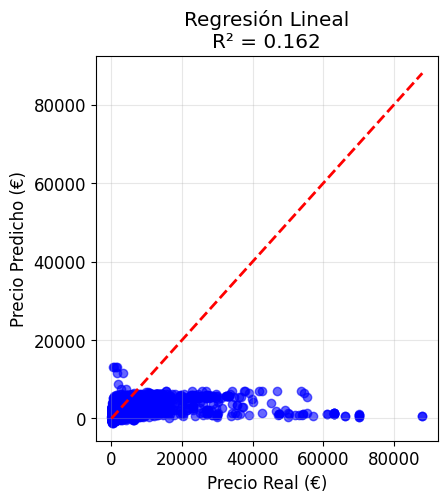

In [130]:
plt.figure(figsize=(15, 5))

# Gráfico: Predicciones vs Valores Reales - Regresión Lineal
plt.subplot(1, 3, 1)
plt.scatter(y_test_reg, y_pred_lineal, alpha=0.6, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Precio Real (€)')
plt.ylabel('Precio Predicho (€)')
plt.title(f'Regresión Lineal\nR² = {r2_lineal:.3f}')
plt.grid(True, alpha=0.3)


### Random Forest

In [131]:
# Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_reg, y_train_reg)

print("Modelo entrenado")

Modelo entrenado


In [132]:
# Evaluar modelo
print("Evaluando modelo random forest...")

# Predicciones
y_pred_rf = modelo_rf.predict(X_test_reg)

# Métricas
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)


print(f"\nRANDOM FOREST:")
print(f"   • R² Score: {r2_rf:.3f} (0=malo, 1=perfecto)")
print(f"   • Error Cuadrático Medio: {mse_rf:.2f} €")
print(f"   • Error Absoluto Promedio: {mae_rf:.2f} €")


Evaluando modelo random forest...

RANDOM FOREST:
   • R² Score: 0.751 (0=malo, 1=perfecto)
   • Error Cuadrático Medio: 1119192.16 €
   • Error Absoluto Promedio: 294.68 €

RANDOM FOREST:
   • R² Score: 0.751 (0=malo, 1=perfecto)
   • Error Cuadrático Medio: 1119192.16 €
   • Error Absoluto Promedio: 294.68 €


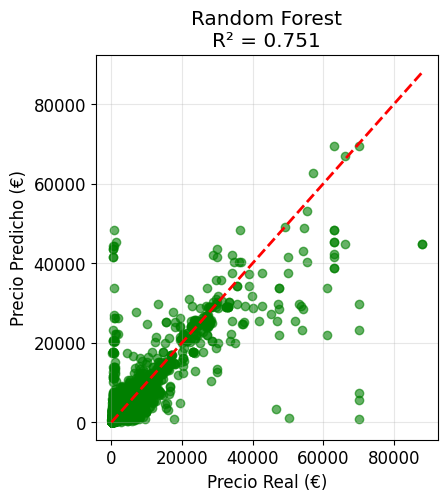

In [133]:
plt.figure(figsize=(15, 5))

# Gráfico: Predicciones vs Valores Reales - Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test_reg, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Precio Real (€)')
plt.ylabel('Precio Predicho (€)')
plt.title(f'Random Forest\nR² = {r2_rf:.3f}')
plt.grid(True, alpha=0.3)


### Machine Learning

In [136]:
# Preparar los datos para la red neuronal
print("Preparando datos...")

# Utilizamos los mismos datos de entrenamiento y prueba que para los otros modelos
X_train_nn = X_train_reg_scaled.copy()  # Ya están escalados
X_test_nn = X_test_reg_scaled.copy()
y_train_nn = y_train_reg.values
y_test_nn = y_test_reg.values

print(f"Datos de entrenamiento: {X_train_nn.shape[0]:,} muestras")
print(f"Datos de prueba: {X_test_nn.shape[0]:,} muestras")

# Definir la arquitectura de la red neuronal usando MLPRegressor de scikit-learn
modelo_nn = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),  # Tres capas ocultas con 64, 32 y 16 neuronas
    activation='relu',              # Función de activación ReLU
    solver='adam',                  # Optimizador Adam
    alpha=0.001,                    # Regularización L2
    batch_size=32,                  # Tamaño del lote
    learning_rate_init=0.001,       # Tasa de aprendizaje inicial
    max_iter=500,                   # Máximo número de iteraciones
    early_stopping=True,            # Parada temprana para evitar sobreajuste
    validation_fraction=0.2,        # 20% para validación
    n_iter_no_change=50,            # Iteraciones sin mejora para parada temprana
    random_state=52,                # Semilla para reproducibilidad
    verbose=True                    # Mostrar progreso durante el entrenamiento
)

# Resumen del modelo
print("\nArquitectura del modelo:")
print(f"Capas ocultas: {(64, 32, 16)}")
print(f"Función de activación: ReLU")
print(f"Optimizador: Adam")
print(f"Regularización (alpha): 0.001")

Preparando datos...
Datos de entrenamiento: 341,887 muestras
Datos de prueba: 85,472 muestras

Arquitectura del modelo:
Capas ocultas: (64, 32, 16)
Función de activación: ReLU
Optimizador: Adam
Regularización (alpha): 0.001
Datos de entrenamiento: 341,887 muestras
Datos de prueba: 85,472 muestras

Arquitectura del modelo:
Capas ocultas: (64, 32, 16)
Función de activación: ReLU
Optimizador: Adam
Regularización (alpha): 0.001


In [137]:
print("\nEntrenando modelo...")

# Entrenar el modelo
modelo_nn.fit(X_train_nn, y_train_nn)



Entrenando modelo...
Iteration 1, loss = 1918421.71903817
Validation score: 0.226817
Iteration 1, loss = 1918421.71903817
Validation score: 0.226817
Iteration 2, loss = 1738128.08701387
Validation score: 0.284698
Iteration 2, loss = 1738128.08701387
Validation score: 0.284698
Iteration 3, loss = 1588676.62461226
Validation score: 0.342712
Iteration 3, loss = 1588676.62461226
Validation score: 0.342712
Iteration 4, loss = 1454066.08135474
Validation score: 0.413571
Iteration 4, loss = 1454066.08135474
Validation score: 0.413571
Iteration 5, loss = 1341767.11568903
Validation score: 0.443922
Iteration 5, loss = 1341767.11568903
Validation score: 0.443922
Iteration 6, loss = 1257577.08901736
Validation score: 0.503239
Iteration 6, loss = 1257577.08901736
Validation score: 0.503239
Iteration 7, loss = 1195812.85225098
Validation score: 0.501673
Iteration 7, loss = 1195812.85225098
Validation score: 0.501673
Iteration 8, loss = 1152893.98929248
Validation score: 0.523004
Iteration 8, loss 

MLPRegressor(alpha=0.001, batch_size=32, early_stopping=True,
             hidden_layer_sizes=(64, 32, 16), max_iter=500, n_iter_no_change=50,
             random_state=52, validation_fraction=0.2, verbose=True)

In [138]:
# Evaluar modelo
print("Evaluando modelo machine learning...")

# Predicciones
y_pred_nn = modelo_nn.predict(X_test_nn)

# Métricas
r2_nn = r2_score(y_test_nn, y_pred_nn)
mse_nn = mean_squared_error(y_test_nn, y_pred_nn)
mae_nn = mean_absolute_error(y_test_nn, y_pred_nn)


print(f"\nRED NEURONAL:")
print(f"   • R² Score: {r2_nn:.3f} (0=malo, 1=perfecto)")
print(f"   • Error Cuadrático Medio: {mse_nn:.2f} €")
print(f"   • Error Absoluto Promedio: {mae_nn:.2f} €")

Evaluando modelo machine learning...

RED NEURONAL:
   • R² Score: 0.700 (0=malo, 1=perfecto)
   • Error Cuadrático Medio: 1345849.69 €
   • Error Absoluto Promedio: 419.55 €


Visualizaciones


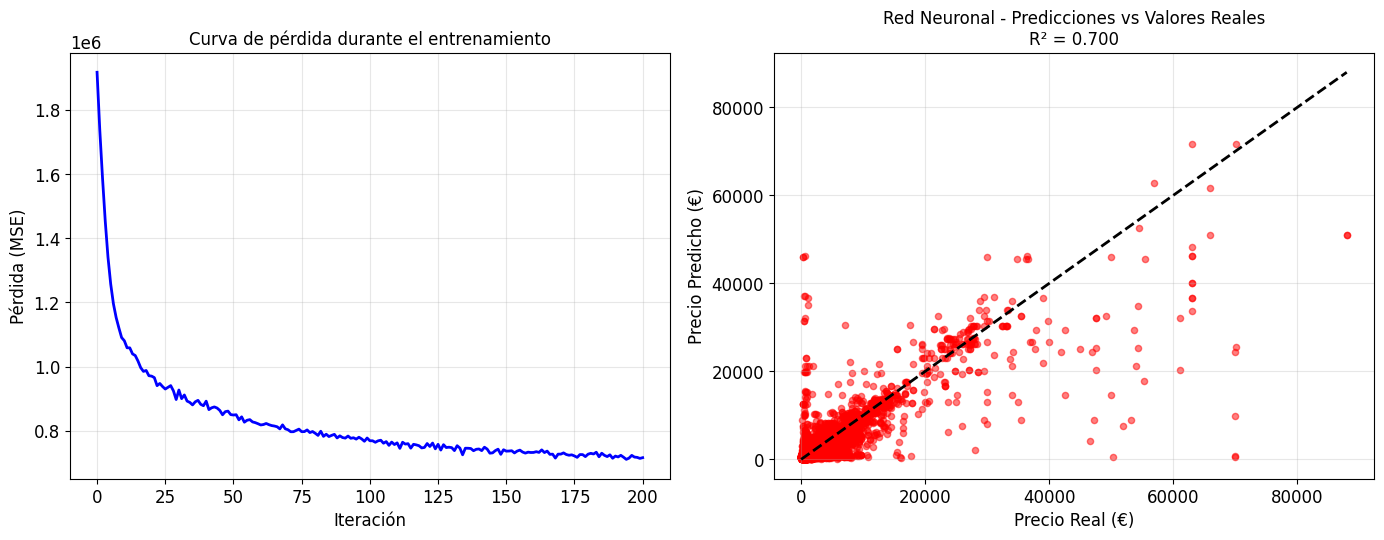

In [146]:
# Visualizar el rendimiento del modelo de red neuronal
print("Visualizaciones")

# Crear una figura con subplots
plt.figure(figsize=(14, 10))

# 1. Curva de aprendizaje (si está disponible en MLPRegressor)
if hasattr(modelo_nn, 'loss_curve_'):
    plt.subplot(2, 2, 1)
    plt.plot(modelo_nn.loss_curve_, linewidth=2, color='blue')
    plt.title('Curva de pérdida durante el entrenamiento', fontsize=12)
    plt.xlabel('Iteración')
    plt.ylabel('Pérdida (MSE)')
    plt.grid(True, alpha=0.3)


# 2. Predicciones vs valores reales (Red Neuronal)
plt.subplot(2, 2, 2 if hasattr(modelo_nn, 'loss_curve_') else 3)
plt.scatter(y_test_nn, y_pred_nn, alpha=0.5, color='red', s=20)
plt.plot([min(y_test_nn), max(y_test_nn)], [min(y_test_nn), max(y_test_nn)], 'k--', linewidth=2)
plt.xlabel('Precio Real (€)')
plt.ylabel('Precio Predicho (€)')
plt.title(f'Red Neuronal - Predicciones vs Valores Reales\nR² = {r2_nn:.3f}', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Modelo de Clustering


In [168]:
# Entrenar modelo de clustering
print("Entrenando modelo de clustering...")

# Escalar los datos para mejor clustering
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)

# Modelo de clustering: K-Means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_clustering_scaled)

# Asignar etiquetas de cluster solo a los hoteles que tienen datos completos
hoteles_clustering = hoteles_clean.loc[X_clustering.index].copy()
hoteles_clustering['cluster'] = kmeans.labels_

print("Modelo de clustering entrenado correctamente")
print(f"Hoteles analizados: {len(hoteles_clustering):,}")
print(f"Clusters asignados: {hoteles_clustering['cluster'].nunique()} únicos")

# Mostrar distribución de clusters
print("\nDistribución de clusters:")
cluster_counts = hoteles_clustering['cluster'].value_counts().sort_index()
for cluster in cluster_counts.index:
    count = cluster_counts[cluster]
    print(f"  Cluster {cluster}: {count:,} hoteles ({count/len(hoteles_clustering)*100:.1f}%)")

Entrenando modelo de clustering...
Modelo de clustering entrenado correctamente
Hoteles analizados: 23,417
Clusters asignados: 4 únicos

Distribución de clusters:
  Cluster 0: 4,610 hoteles (19.7%)
  Cluster 1: 5,862 hoteles (25.0%)
  Cluster 2: 12,911 hoteles (55.1%)
  Cluster 3: 34 hoteles (0.1%)


Evaluando modelo de clustering...
Silhouette Score: 0.408 (1=perfecto, -1=malo)

Información de clusters:
Número de clusters: 4
Inercia (suma de distancias cuadráticas): 26934.77
Evaluación completada
Visualizando clusters en detalle (sin coordenadas geográficas)...
Silhouette Score: 0.408 (1=perfecto, -1=malo)

Información de clusters:
Número de clusters: 4
Inercia (suma de distancias cuadráticas): 26934.77
Evaluación completada
Visualizando clusters en detalle (sin coordenadas geográficas)...


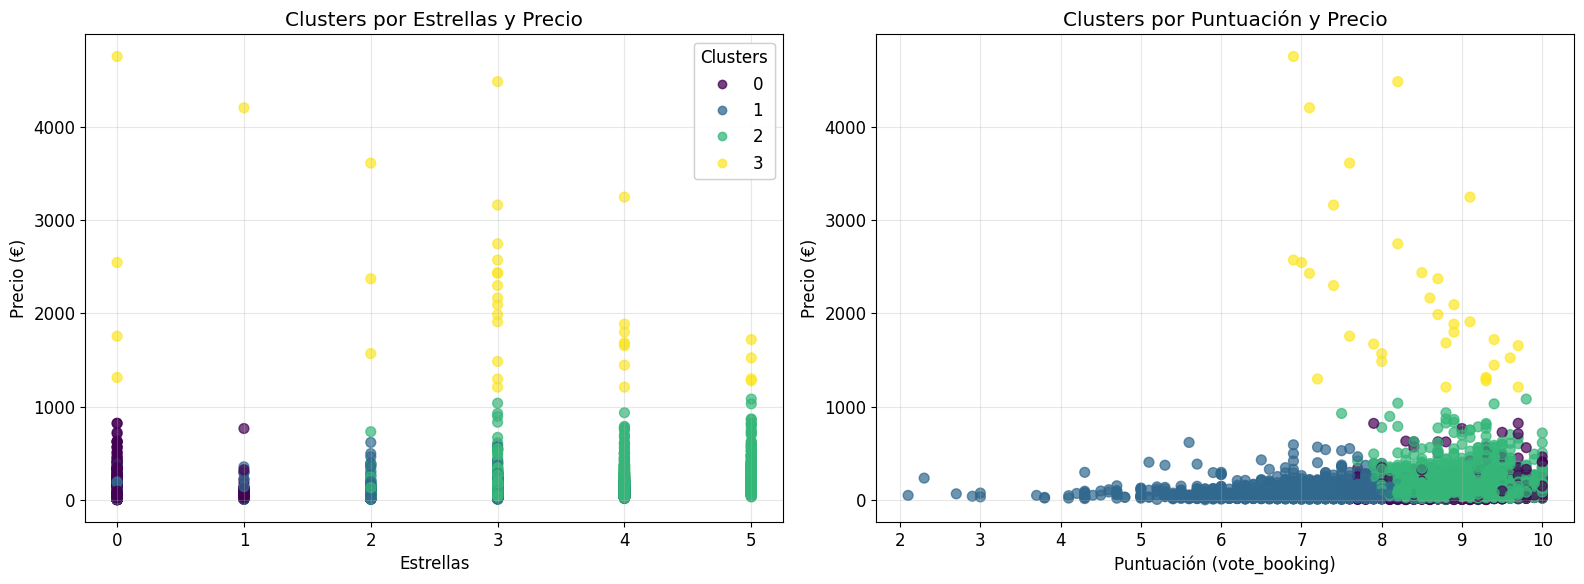


Características promedio por cluster:
         stars    price  vote_booking
cluster                              
0         0.12    70.57          8.89
1         2.46    56.24          7.54
2         3.41    83.72          8.91
3         2.97  2200.21          8.39

Visualización de clusters completada


In [169]:
# Evaluar modelo de clustering
print("Evaluando modelo de clustering...")

# Calcular la métrica de Silhouette
silhouette_avg = silhouette_score(X_clustering_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f} (1=perfecto, -1=malo)")

# Análisis adicional de clusters
print(f"\nInformación de clusters:")
print(f"Número de clusters: {kmeans.n_clusters}")
print(f"Inercia (suma de distancias cuadráticas): {kmeans.inertia_:.2f}")

print("Evaluación completada")

# Modificar visualización para excluir coordenadas geográficas
print("Visualizando clusters en detalle (sin coordenadas geográficas)...")

# Agregar etiquetas de cluster al dataframe
X_clustering_with_labels = X_clustering.copy()
X_clustering_with_labels['cluster'] = kmeans.labels_

# Crear figura con múltiples gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Precio vs Estrellas por cluster
scatter1 = axes[0].scatter(X_clustering['stars'], X_clustering['price'], 
                  c=kmeans.labels_, cmap='viridis', alpha=0.7, s=50)
axes[0].set_xlabel('Estrellas')
axes[0].set_ylabel('Precio (€)')
axes[0].set_title('Clusters por Estrellas y Precio')
axes[0].grid(True, alpha=0.3)
legend1 = axes[0].legend(*scatter1.legend_elements(), title="Clusters")
axes[0].add_artist(legend1)

# Gráfico 2: Puntuación vs Precio por cluster
scatter2 = axes[1].scatter(X_clustering['vote_booking'], X_clustering['price'], 
                  c=kmeans.labels_, cmap='viridis', alpha=0.7, s=50)
axes[1].set_xlabel('Puntuación (vote_booking)')
axes[1].set_ylabel('Precio (€)')
axes[1].set_title('Clusters por Puntuación y Precio')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analizar características de cada cluster
print("\nCaracterísticas promedio por cluster:")
cluster_means = X_clustering_with_labels.groupby('cluster').mean()
# Redondear para mejor visualización
cluster_means_rounded = cluster_means.round(2)
print(cluster_means_rounded)

print("\nVisualización de clusters completada")

Calculando la métrica Elbow...


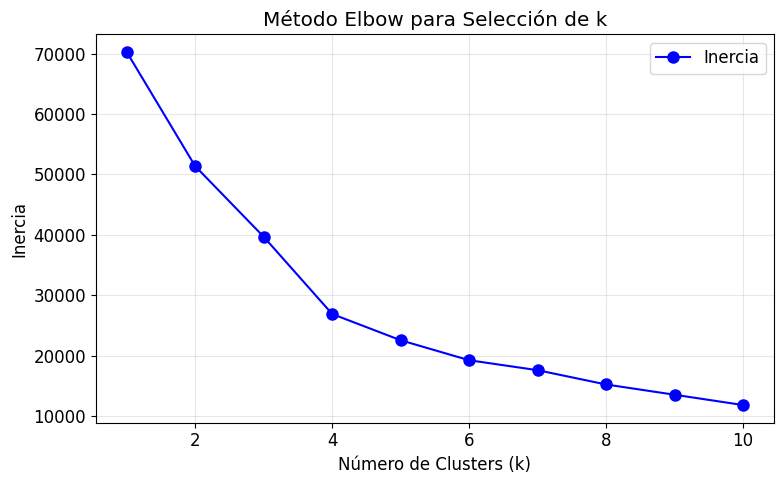

Métrica Elbow calculada y visualizada correctamente


In [170]:
# Calcular la métrica Elbow para determinar el número óptimo de clusters
print("Calculando la métrica Elbow...")

# Lista para almacenar las inercia de cada número de clusters
inercias = []
K = range(1, 11)  # Probar de 1 a 10 clusters

for k in K:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_clustering_scaled)
    inercias.append(kmeans_temp.inertia_)

# Graficar la métrica Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inercias, 'bo-', markersize=8, label='Inercia')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método Elbow para Selección de k')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("Métrica Elbow calculada y visualizada correctamente")

In [171]:
# Analizar la distribución de valores de estrellas en el dataset original
print("Analizando valores de estrellas en hoteles...")

# Contar valores únicos de estrellas
valores_estrellas = hoteles['stars'].value_counts().sort_index()
print("Distribución de valores en campo 'stars':")
for valor, cantidad in valores_estrellas.items():
    print(f"  Estrellas = {valor}: {cantidad:,} hoteles ({cantidad/len(hoteles)*100:.2f}%)")

# Verificar específicamente hoteles con -1 estrellas
hoteles_sin_estrellas = hoteles[hoteles['stars'] == -1]
print(f"\nHoteles con valor -1 en estrellas: {len(hoteles_sin_estrellas):,} ({len(hoteles_sin_estrellas)/len(hoteles)*100:.2f}%)")

# Mostrar algunos ejemplos de hoteles sin estrellas
if len(hoteles_sin_estrellas) > 0:
    print("\nEjemplos de hoteles con valor -1 en estrellas:")
    display(hoteles_sin_estrellas.head(3))

Analizando valores de estrellas en hoteles...
Distribución de valores en campo 'stars':
  Estrellas = -1: 12,497 hoteles (11.54%)
  Estrellas = 0: 20,506 hoteles (18.94%)
  Estrellas = 1: 1,398 hoteles (1.29%)
  Estrellas = 2: 3,271 hoteles (3.02%)
  Estrellas = 3: 36,513 hoteles (33.72%)
  Estrellas = 4: 33,414 hoteles (30.86%)
  Estrellas = 5: 679 hoteles (0.63%)

Hoteles con valor -1 en estrellas: 12,497 (11.54%)

Ejemplos de hoteles con valor -1 en estrellas:


,id_hotel,hotel_name,stars,price,address,lat,lon,vote_booking,type,description,id_country,checkin_min,checkin_max,checkout_min,checkout_max,facilities
2,3518655,El Mar,-1,NaN,"4 Calle Cruz Roja, 11380 Tarifa, España",36.011128,-5.605286,NaN,2,NaN,195,NaN,NaN,NaN,NaN,"[767,768,773,774,775,776,777,779,780,781,782,7..."
5,3518644,BOMBAYARTE APARTHOTEL TARIFA,-1,NaN,"302 Calle Castellar de la Frontera, 11380 Tari...",36.027411,-5.610992,NaN,10,NaN,195,NaN,NaN,NaN,NaN,"[423,439,443,767,768,769,770,771,773,774,775,7..."
6,3518563,Chalet rural-familiar con piscina junto a la p...,-1,NaN,"Calle los Algarbes, Valdevaqueros, 11380 Tarif...",36.073213,-5.695010,NaN,4,NaN,195,NaN,NaN,NaN,NaN,[]


## 7. Modelo de Clasificación 

In [179]:
# Dividir datos para clasificación
print("Dividiendo datos para clasificación...")

# IMPORTANTE: Asegurar que no hay valores NaN
print("Verificando valores NaN...")
X_clasificacion_clean = X_clasificacion.copy()
y_clasificacion_clean = y_clasificacion.copy()

print(f"Datos para clasificación: {X_clasificacion_clean.shape[0]} hoteles, {X_clasificacion_clean.shape[1]} características")

# Dividir en entrenamiento y prueba
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_clasificacion_clean, y_clasificacion_clean, 
    test_size=0.2, 
    random_state=42,
    stratify=y_clasificacion_clean  # Mantener distribución de clases
)

print(f"Datos de entrenamiento: {X_train_cls.shape[0]:,} hoteles")
print(f"Datos de prueba: {X_test_cls.shape[0]:,} hoteles")
print(f"Proporción: {X_train_cls.shape[0]/(X_train_cls.shape[0]+X_test_cls.shape[0])*100:.0f}% entrenamiento, {X_test_cls.shape[0]/(X_train_cls.shape[0]+X_test_cls.shape[0])*100:.0f}% prueba")

# Escalar características para mejor rendimiento
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

print("Datos de clasificación preparados correctamente")

Dividiendo datos para clasificación...
Verificando valores NaN...
Datos para clasificación: 23417 hoteles, 3 características
Datos de entrenamiento: 18,733 hoteles
Datos de prueba: 4,684 hoteles
Proporción: 80% entrenamiento, 20% prueba
Datos de clasificación preparados correctamente


In [180]:
# Entrenar modelos de clasificación
print("Entrenando modelos de clasificación...")

# Modelo 1: Random Forest Classifier
modelo_rf_cls = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf_cls.fit(X_train_cls, y_train_cls)

# Modelo 2: Regresión Logística (multiclase)
modelo_log = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
modelo_log.fit(X_train_cls_scaled, y_train_cls)

print("Modelos de clasificación entrenados:")
print("  1. Random Forest Classifier")
print("  2. Regresión Logística Multinomial")

Entrenando modelos de clasificación...
Modelos de clasificación entrenados:
  1. Random Forest Classifier
  2. Regresión Logística Multinomial
Modelos de clasificación entrenados:
  1. Random Forest Classifier
  2. Regresión Logística Multinomial


In [181]:
# Evaluar modelos de clasificación
print("Evaluando modelos de clasificación...")

# Predicciones
y_pred_rf_cls = modelo_rf_cls.predict(X_test_cls)
y_pred_log = modelo_log.predict(X_test_cls_scaled)

# Métricas para Random Forest
acc_rf = accuracy_score(y_test_cls, y_pred_rf_cls)
report_rf = classification_report(y_test_cls, y_pred_rf_cls)

# Métricas para Regresión Logística
acc_log = accuracy_score(y_test_cls, y_pred_log)
report_log = classification_report(y_test_cls, y_pred_log)

print("\nRESULTADOS DE CLASIFICACIÓN:")
print("=" * 50)

print(f"\nRANDOM FOREST:")
print(f"   • Exactitud (Accuracy): {acc_rf:.3f} (0=malo, 1=perfecto)")
print(f"   • Informe detallado:")
print(report_rf)

print(f"\nREGRESIÓN LOGÍSTICA:")
print(f"   • Exactitud (Accuracy): {acc_log:.3f} (0=malo, 1=perfecto)")
print(f"   • Informe detallado:")
print(report_log)

# Determinar mejor modelo
mejor_modelo_cls = "Random Forest" if acc_rf > acc_log else "Regresión Logística"
print(f"\nMEJOR MODELO: {mejor_modelo_cls}")
print(f"Con una exactitud de {max(acc_rf, acc_log)*100:.1f}%")

Evaluando modelos de clasificación...

RESULTADOS DE CLASIFICACIÓN:

RANDOM FOREST:
   • Exactitud (Accuracy): 0.486 (0=malo, 1=perfecto)
   • Informe detallado:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45       918
           1       0.15      0.11      0.13       189
           2       0.33      0.31      0.32       427
           3       0.53      0.58      0.55      1890
           4       0.52      0.50      0.51      1179
           5       0.51      0.42      0.46        81

    accuracy                           0.49      4684
   macro avg       0.42      0.39      0.40      4684
weighted avg       0.48      0.49      0.48      4684


REGRESIÓN LOGÍSTICA:
   • Exactitud (Accuracy): 0.442 (0=malo, 1=perfecto)
   • Informe detallado:
              precision    recall  f1-score   support

           0       0.24      0.08      0.11       918
           1       0.00      0.00      0.00       189
           2       0.50      0.0

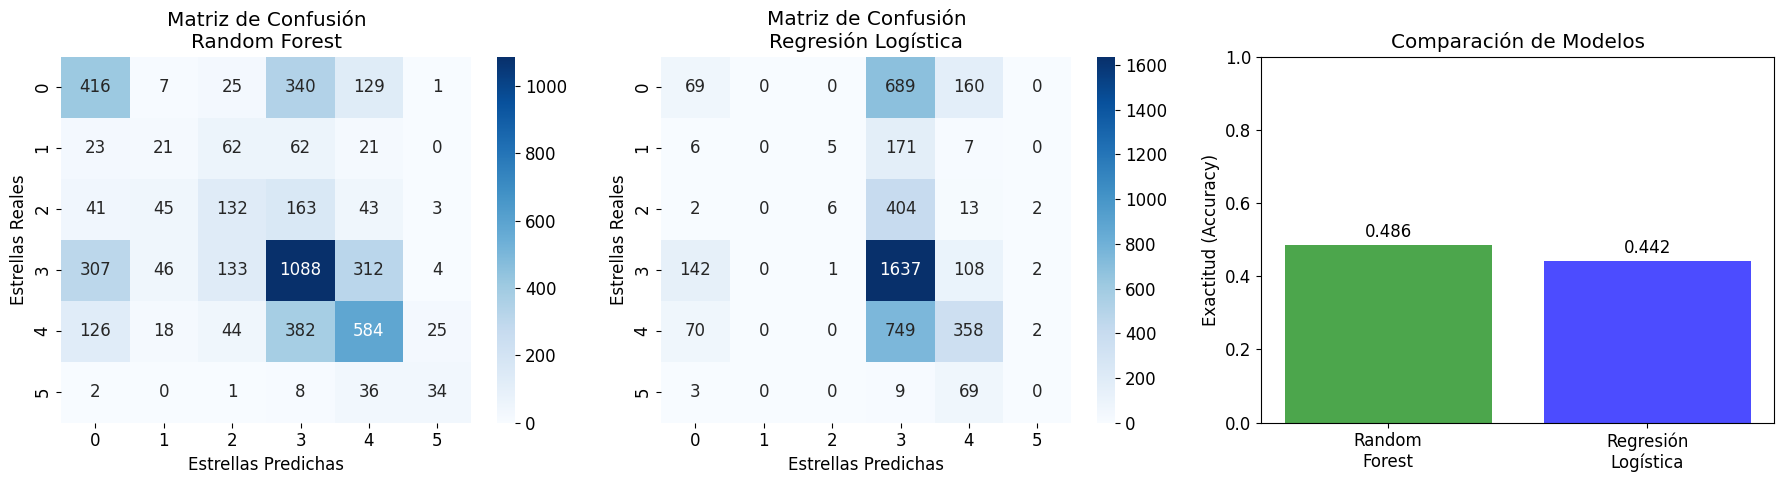

In [182]:
# Matrices de confusión
cm_rf = confusion_matrix(y_test_cls, y_pred_rf_cls)
cm_log = confusion_matrix(y_test_cls, y_pred_log)

# Crear figura para visualizaciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Matriz de confusión para Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusión\nRandom Forest')
axes[0].set_xlabel('Estrellas Predichas')
axes[0].set_ylabel('Estrellas Reales')

# Matriz de confusión para Regresión Logística
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Matriz de Confusión\nRegresión Logística')
axes[1].set_xlabel('Estrellas Predichas')
axes[1].set_ylabel('Estrellas Reales')

# Comparación de accuracy
modelos = ['Random\nForest', 'Regresión\nLogística']
accuracies = [acc_rf, acc_log]
colors = ['green', 'blue']

bars = axes[2].bar(modelos, accuracies, color=colors, alpha=0.7)
axes[2].set_ylim(0, 1)
axes[2].set_ylabel('Exactitud (Accuracy)')
axes[2].set_title('Comparación de Modelos')

# Añadir valores en las barras
for bar, acc in zip(bars, accuracies):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



Analizando importancia de características...


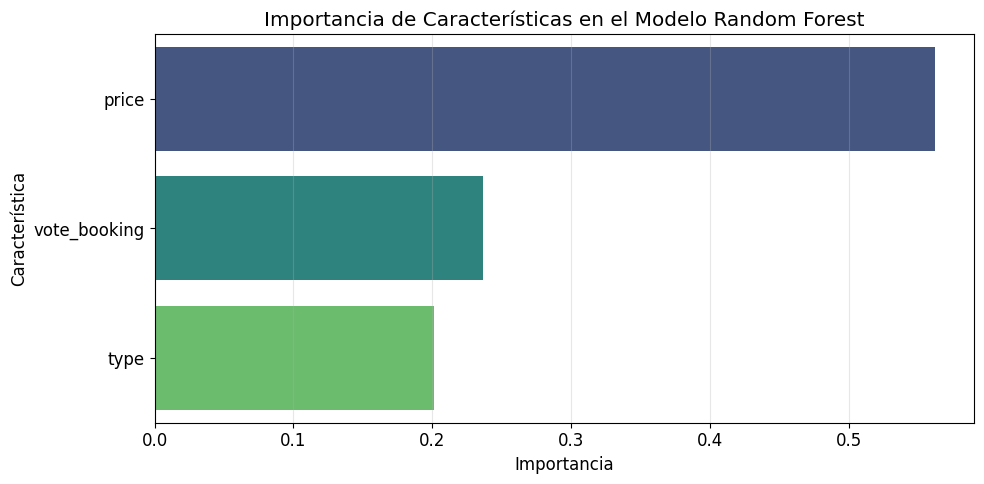

In [183]:
# Analizar importancia de características para Random Forest
print("Analizando importancia de características...")

# Obtener importancia de características
importancias = modelo_rf_cls.feature_importances_
indices = np.argsort(importancias)[::-1]

# Crear dataframe para visualizar
df_importancia = pd.DataFrame({
    'Característica': [caracteristicas_clasificacion[i] for i in indices],
    'Importancia': [importancias[i] for i in indices]
})

# Visualizar
plt.figure(figsize=(10, 5))
sns.barplot(x='Importancia', y='Característica', data=df_importancia, palette='viridis')
plt.title('Importancia de Características en el Modelo Random Forest')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
